In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataf = pd.read_csv("/share/data/school_choice/Data/Cleaned/student_1920.csv", sep=",")
dataf.head(10)

,Unnamed: 0,studentno,r1_ranked_idschool,r1_listed_ranks,r1_programs,grade,r1_randomnumber,randomnumber,requestprogramdesignation,latitude,...,AALPI Score,Academic Score,N'hood SES Score,FRL Score,sibling,currentlpsibling,currentlp,msf,aaprek,aa
0,0,10019435,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,...,0.204972,0.101064,0.387407,0.066313,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10031302,"[815, 559, 439, 559, 785]","[1, 2, 3, 4, 5]","['CA', 'BA', 'CA', 'CA', 'CA']",13,"[0.40869254941208505, 0.259257627732611, 0.231...",0.006416,0.0,37.708783,...,0.517824,0.490157,0.629132,0.619612,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10033269,[764],[1],['CA'],13,[0.996115733080247],0.229133,0.0,37.734997,...,0.754253,0.938095,0.932494,0.822137,NaN,NaN,NaN,NaN,NaN,NaN
3,3,10034607,"[815, 853]","[1, 2]","['CA', 'CA']",13,"[0.346680243635614, 0.013923836320173]",0.373381,0.0,37.709339,...,0.411856,0.417219,0.684535,0.671444,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10034799,"[559, 725, 785]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.386016426419183, 0.841100588083223, 0.01709...",0.424068,0.0,37.781808,...,0.560976,0.800353,0.815533,0.840754,NaN,NaN,NaN,NaN,NaN,NaN
5,5,10036346,[725],[1],['GE'],12,[0.3524225273301121],0.604200,0.0,37.731301,...,0.865119,0.945841,0.912961,0.789762,NaN,NaN,NaN,NaN,NaN,NaN
6,6,10037570,"[725, 785, 697, 815]","[1, 2, 3, 4]","['CA', 'CA', 'CA', 'CA']",13,"[0.9660791892312659, 0.9618670443541801, 0.168...",0.031473,0.0,37.768764,...,0.000000,0.048387,0.275344,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
7,7,10037645,[405],[1],['GE'],12,[0.250883559549645],0.445316,0.0,37.709438,...,0.256718,0.336986,0.655440,0.643076,NaN,NaN,NaN,NaN,NaN,NaN
8,8,10037766,"[405, 439]","[1, 2]","['GE', 'GE']",12,"[0.457975617054178, 0.17807397545462197]",0.003786,0.0,37.728024,...,0.166215,0.251825,0.639052,0.499911,NaN,NaN,NaN,NaN,NaN,NaN
9,9,10038296,"[439, 405]","[1, 2]","['GE', 'GE']",12,"[0.638786218310657, 0.864228362024592]",0.001505,0.0,37.708563,...,0.256718,0.336986,0.655440,0.643076,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
mean_AALPI = np.mean(dataf["AALPI Score"])
mean_AALPI

0.3600936886099679

In [3]:
print(dataf.columns)

Index(['Unnamed: 0', 'studentno', 'r1_ranked_idschool', 'r1_listed_ranks',
       'r1_programs', 'grade', 'r1_randomnumber', 'randomnumber',
       'requestprogramdesignation', 'latitude', 'longitude',
       'r2_ranked_idschool', 'r2_listed_ranks', 'r2_programs',
       'r2_randomnumber', 'r1_idschool', 'r1_programcode', 'r1_rank',
       'r1_isdesignation', 'r1_distance', 'ctip1', 'idschoolattendance',
       'r2_idschool', 'r2_programcode', 'r2_rank', 'r2_isdesignation',
       'r2_distance', 'zipcode', 'sex', 'speced', 'ethnicity_desc',
       'disability', 'homelang_desc', 'englprof_desc', 'enrolled_idschool',
       'resolved_ethnicity', 'math_scalescore', 'ela_scalescore',
       'final_school', 'num_ranked', 'census_block', 'freelunch_prob',
       'reducedlunch_prob', 'census_blockgroup', 'census_tract', 'HOCidx1',
       'HOCidx2', 'HOCidx3', 'AALPI Score', 'Academic Score',
       'N'hood SES Score', 'FRL Score', 'sibling', 'currentlpsibling',
       'currentlp', 'msf', 'aap

In [4]:
#Metric 1 for Socioeconomic diversity is Representativeness
# Ensure schools' average SES is within x% of district average
dataf["N'hood SES Score"]

0        0.387407
1        0.629132
2        0.932494
3        0.684535
4        0.815533
           ...   
15569    0.912961
15570         NaN
15571    0.512252
15572         NaN
15573    0.927495
Name: N'hood SES Score, Length: 15574, dtype: float64

In [5]:
dataf.groupby("census_tract").count()

,Unnamed: 0,studentno,r1_ranked_idschool,r1_listed_ranks,r1_programs,grade,r1_randomnumber,randomnumber,requestprogramdesignation,latitude,...,AALPI Score,Academic Score,N'hood SES Score,FRL Score,sibling,currentlpsibling,currentlp,msf,aaprek,aa
census_tract,,,,,,,,,,,,,,,,,,,,,
6.075010e+09,36,36,33,33,33,36,33,36,36,36,...,36,36,36,36,4,0,0,7,0,8
6.075010e+09,25,25,21,21,21,25,21,25,25,25,...,25,25,25,25,2,0,0,2,0,6
6.075010e+09,31,31,30,30,30,31,30,31,31,31,...,31,31,31,31,3,0,0,6,0,8
6.075010e+09,32,32,31,31,31,32,31,32,32,32,...,32,32,32,32,3,0,2,10,0,5
6.075010e+09,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,6,0,0,3,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.075062e+09,93,93,87,87,87,93,87,93,93,93,...,93,93,93,93,11,0,0,16,0,5
6.075980e+09,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,0,0,0,1,0,0
6.075981e+09,21,21,20,20,20,21,20,21,21,21,...,21,21,21,21,3,1,1,3,0,2


In [6]:
#Metric 2 for Socioeconomic diversity is Limited Isolation
# Ensure that each schools' fraction of socioeconomically disadvantaged students (SED) is at most x% 
dataf.groupby("census_tract").mean()["N'hood SES Score"]

census_tract
6.075010e+09    0.577771
6.075010e+09    0.329193
6.075010e+09    0.417691
6.075010e+09    0.355596
6.075010e+09    0.470624
                  ...   
6.075062e+09    0.275997
6.075980e+09    0.606021
6.075981e+09    0.958967
6.075981e+09    0.860153
6.075981e+09    0.492500
Name: N'hood SES Score, Length: 194, dtype: float64

In [7]:
dataf.groupby(["ctip1"]).count()

,Unnamed: 0,studentno,r1_ranked_idschool,r1_listed_ranks,r1_programs,grade,r1_randomnumber,randomnumber,requestprogramdesignation,latitude,...,AALPI Score,Academic Score,N'hood SES Score,FRL Score,sibling,currentlpsibling,currentlp,msf,aaprek,aa
ctip1,,,,,,,,,,,,,,,,,,,,,
0.0,12993,12993,12130,12130,12130,12993,12130,12993,12993,12987,...,12205,12205,12205,12205,1955,38,424,2291,117,2642
1.0,2581,2581,2404,2404,2404,2581,2404,2581,2581,2579,...,2433,2433,2433,2433,387,16,138,408,37,168


In [8]:
#Metric 3 for Socioeconomic diversity is exposure 
# Ensure that each schools' fraction of socioeconomically disadvantaged students is at least x% 

In [9]:
#Metric 1 of Racial diversity is Race and SES
#Ensure that at most x% of AALPI are assigned in any school with fraction of SED higher than y%

In [10]:
dataf["ctip1"].value_counts()

0.0    12993
1.0     2581
Name: ctip1, dtype: int64

In [11]:
dataf["homelang_desc"]

0        EN-English
1        SP-Spanish
2        EN-English
3        SP-Spanish
4        EN-English
            ...    
15569           NaN
15570           NaN
15571           NaN
15572           NaN
15573           NaN
Name: homelang_desc, Length: 15574, dtype: object

In [12]:
dataf["homelang_desc"].value_counts()

EN-English                       4045
SP-Spanish                       1770
CC-Chinese Cantonese             1690
CM-Chinese Mandarin               228
IV-Vietnamese                     161
FT-Filipino Tagalog               105
TS-Chinese (Toishanese)            90
AR-Arabic                          81
RU-Russian                         67
JA-Japanese                        67
OT-Other Non-English Language      37
KO-Korean                          23
TH-Thai                            21
FR-French                          21
UR-Unknown                         19
HI-Hindi (India)                   17
PO-Portuguese                      16
BU-Burmese                         16
CO-Chinese Other                   13
OA-Other Asian                     12
SA-Samoan                          10
AH-Amharic (Ethiopia)               9
IT-Italian                          8
GE-German                           8
CA-Kmer                             8
BG-Belgian                          8
SD-Swedish  

In [13]:
dataf["englprof_desc"].value_counts()

E-English            3642
L-Limited English    1989
R-Redesignated       1979
P-Pending             996
F-Fluent              449
N-Non English          25
Name: englprof_desc, dtype: int64

In [14]:
group_ethnicity = dataf["resolved_ethnicity"].value_counts()
group_ethnicity

Hispanic/Latino                      2546
Chinese                              2410
White                                1298
Decline to State                      845
Two or More Races                     767
Black or African American             556
Filipino                              227
Vietnamese                            224
Middle Eastern/Arabic                 116
Other Asian                           116
Asian Indian                           94
Japanese                               64
Korean                                 55
Samoan                                 28
American Indian or Alaskan Native      22
Cambodian                              16
Hawaiian                               13
Other Pacific Islander                  9
Hmong                                   2
500                                     2
Guamanian                               2
Tahitian                                1
Laotian                                 1
Name: resolved_ethnicity, dtype: i

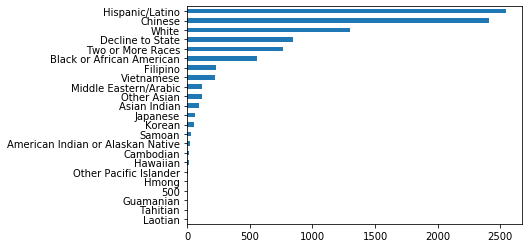

In [15]:
dataf.resolved_ethnicity.value_counts().sort_values().plot(kind = 'barh')

In [16]:
df = pd.read_csv("~/displacement-typologies/data/outputs/typologies/SanFrancisco_typology_output.csv", sep=",")
df.head(10)

,Unnamed: 0,pop_18,white_18,hh_18,hinc_18,mhval_18,mhval_18_se,mrent_18,mrent_18_se,total_25_18,...,BE,SMMI,ARG,EOG,OD,OD_loss,LISD,double_counted,typology,typ_cat
0,0,2772.0,1388.0,1108.0,55125.0,640600.0,36856.0,1185.0,99.0,2014.0,...,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
1,1,4127.0,2874.0,1550.0,100202.0,718900.0,47042.0,1829.0,132.0,2919.0,...,0.0,1.0,0.0,0.0,0,0.0,0,1.0,6.0,['SMMI']
2,2,722.0,396.0,37.0,6953.0,-666666666.0,-222222222.0,394.0,362.0,699.0,...,0.0,0.0,1.0,0.0,0,0.0,0,1.0,3.0,['ARG']
3,3,5070.0,3335.0,2045.0,40733.0,321000.0,38985.0,910.0,131.0,3501.0,...,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
4,4,3338.0,1900.0,1628.0,33194.0,328400.0,35481.0,952.0,47.0,2257.0,...,0.0,0.0,0.0,0.0,1,1.0,0,1.0,2.0,['OD']
5,5,4626.0,1591.0,2057.0,27663.0,275900.0,56460.0,826.0,69.0,2933.0,...,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
6,6,2450.0,2123.0,929.0,54745.0,316000.0,25676.0,1124.0,65.0,1646.0,...,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
7,7,5908.0,4764.0,2692.0,94853.0,495900.0,55770.0,1473.0,153.0,4672.0,...,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
8,8,3471.0,2451.0,1574.0,60870.0,410200.0,30194.0,1048.0,126.0,2410.0,...,0.0,0.0,0.0,0.0,1,1.0,0,1.0,2.0,['OD']
9,9,2691.0,2230.0,1176.0,122000.0,562900.0,26533.0,2250.0,1453.0,2211.0,...,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']


In [17]:
df["GEOID"]

0       6055200202
1       6055200400
2       6055200900
3       6067006101
4       6067006102
           ...    
2104    6055201401
2105    6055201402
2106    6055201403
2107    6055201601
2108    6055201602
Name: GEOID, Length: 2109, dtype: int64

In [18]:
#SAE: Stable Advanced Exclusive Typology
#AdvG: Advanced Gentrification Typology
#ARE: At Risk of Being Exclusive Typology
#BE: Becoming Exclusive
#SMMI: Stable Middle/Moderate Income
#ARG: At Risk of Gentrification
#EOG: Early Ongoing Gentrification
#OD: Ongoing Displacement
cols = {"SAE": None, "AdvG": None, "ARE": None, "BE": None, "SMMI": None, "ARG": None, "EOG": None, "OD": None}
filtered_df = df[cols]
filtered_df.head(20)

,SAE,AdvG,ARE,BE,SMMI,ARG,EOG,OD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [19]:
filtered_df["SAE"].value_counts()

0.0    1875
1.0     229
Name: SAE, dtype: int64

In [20]:
filtered_df["AdvG"].value_counts()

0.0    2034
1.0      75
Name: AdvG, dtype: int64

In [21]:
filtered_df["ARE"].value_counts()

0.0    1770
1.0     339
Name: ARE, dtype: int64

In [22]:
filtered_df["BE"].value_counts()

0.0    1997
1.0     105
Name: BE, dtype: int64

In [23]:
filtered_df["SMMI"].value_counts()

0.0    1441
1.0     668
Name: SMMI, dtype: int64

In [24]:
filtered_df["ARG"].value_counts()

0.0    2020
1.0      89
Name: ARG, dtype: int64

In [25]:
filtered_df["EOG"].value_counts()

0.0    2085
1.0      20
Name: EOG, dtype: int64

In [26]:
filtered_df["OD"].value_counts()

0    2061
1      48
Name: OD, dtype: int64

In [27]:
for key in cols: 
    new_val = len(filtered_df[filtered_df[key] == 1][key])
    cols[key] = new_val

In [28]:
dataf["census_blockgroup"]

0        6.075031e+10
1        6.075026e+10
2        6.075023e+10
3        6.075026e+10
4        6.075016e+10
             ...     
15569    6.075023e+10
15570             NaN
15571    6.075048e+10
15572             NaN
15573    6.075061e+10
Name: census_blockgroup, Length: 15574, dtype: float64

In [29]:
dataf["census_tract"]

0        6.075031e+09
1        6.075026e+09
2        6.075023e+09
3        6.075026e+09
4        6.075016e+09
             ...     
15569    6.075023e+09
15570             NaN
15571    6.075048e+09
15572             NaN
15573    6.075061e+09
Name: census_tract, Length: 15574, dtype: float64

In [30]:
step1_df = dataf.merge(df, left_on = "census_tract", right_on = "GEOID")
new_df = step1_df[["GEOID", "SAE", "AdvG", "ARE", "BE", "SMMI", "ARG", "EOG", "OD"]]
new_df = new_df.drop_duplicates()
new_df.head(30)

,GEOID,SAE,AdvG,ARE,BE,SMMI,ARG,EOG,OD
0,6075030700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
191,6075026200,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
416,6075023103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
623,6075026303,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
763,6075016100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
897,6075023102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1032,6075017000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1064,6075031302,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1186,6075025600,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1327,6075020402,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [31]:
new_df["SAE"].value_counts()[1]

16

In [32]:
frequencies = {}
for col in new_df.columns: 
    if col != "GEOID": 
        frequencies[col] = new_df[col].value_counts()[1]

'''col_names = sorted(frequencies, key=frequencies.get)
frequencies_list = sorted(frequencies.values())
frequencies_list'''

col_names = ["OD", "ARG", "EOG", "AdvG", "SMMI", "ARE", "BE", "SAE"]
frequencies_list = []
for col in col_names:
    frequencies_list.append(frequencies[col])

In [33]:
col_names

['OD', 'ARG', 'EOG', 'AdvG', 'SMMI', 'ARE', 'BE', 'SAE']

In [34]:
frequencies

{'SAE': 16,
 'AdvG': 32,
 'ARE': 24,
 'BE': 29,
 'SMMI': 58,
 'ARG': 2,
 'EOG': 4,
 'OD': 9}

<BarContainer object of 8 artists>

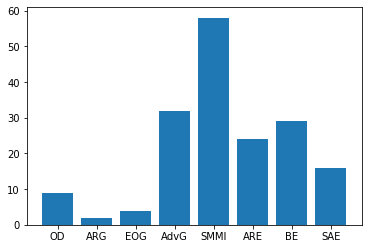

In [35]:
plt.bar(col_names, frequencies_list)
#distribution of gentrification statues across census tracts in SFUSD

In [36]:
ctip1_df = step1_df[step1_df["ctip1"] == 1]
ctip1_df = ctip1_df[["GEOID", "SAE", "AdvG", "ARE", "BE", "SMMI", "EOG", "OD"]]
ctip1_df = ctip1_df.drop_duplicates()

In [37]:
new_frequencies = {}
for col in ctip1_df.columns: 
    if col != "GEOID": 
        new_frequencies[col] = ctip1_df[col].value_counts()[1]

'''column_names = sorted(new_frequencies, key=new_frequencies.get)
frequency_list = sorted(new_frequencies.values())
frequency_list'''
column_names = ["OD", "ARG", "EOG", "AdvG", "SMMI", "ARE", "BE", "SAE"]
frequency_list = []
for col in column_names:
    if col in new_frequencies: 
        frequency_list.append(new_frequencies[col])
    else: 
        frequency_list.append(0)

In [38]:
frequency_list

[4, 0, 4, 17, 9, 5, 5, 3]

In [39]:
new_frequencies

{'SAE': 3, 'AdvG': 17, 'ARE': 5, 'BE': 5, 'SMMI': 9, 'EOG': 4, 'OD': 4}

<BarContainer object of 8 artists>

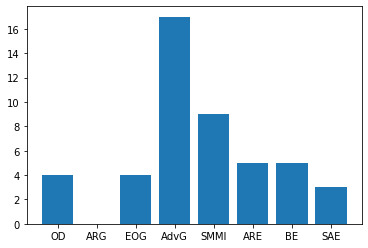

In [40]:
plt.bar(column_names, frequency_list)
#distribution of gentrification statues across census tracts in SFUSD with ctip1 scores 
#can see that the majority of CTIP1 students are living in areas with advanced gentrification 

In [41]:
#compare proportions for CTIP1 and rest of the population 
#also look at ctip2 regions to see how they compare to ctip1 

In [42]:
labels = ["All Students", "CTIP1 Students"]

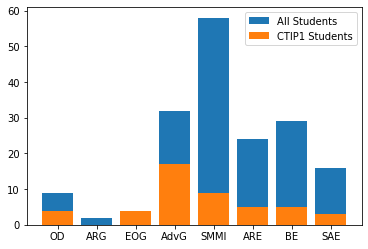

In [43]:
new_cols = ["At Risk of Gentrification", "Early Ongoing Gentrification", "Ongoing Displacement", "Stable Advanced Exclusive",
           "At Risk of Being Exclusive", "Becoming Exclusive", "Advanced Gentrification", "Stable Middle/Moderate Income"]
plt.bar(column_names, frequencies_list)
plt.bar(column_names, frequency_list)
plt.legend(labels)
#compare the distribution of gentrification statuses for CTIP1 vs all students in SFUSD 

In [44]:
#change the axis to percentages 
# also create a map of the gentrification areas 

In [45]:
#normalized distribution of all student's locations in terms of gentrification
normal = [float(i)/sum(frequencies_list) for i in frequencies_list] 
new_normal = [i*100 for i in normal]
new_normal

[5.172413793103448,
 1.1494252873563218,
 2.2988505747126435,
 18.39080459770115,
 33.33333333333333,
 13.793103448275861,
 16.666666666666664,
 9.195402298850574]

Text(0.5, 0, 'Displacement Typology')

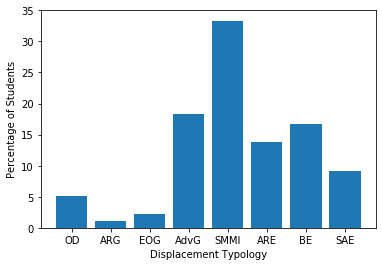

In [46]:
plt.bar(col_names, new_normal)
plt.ylabel("Percentage of Students")
plt.xlabel("Displacement Typology")

In [47]:
#NORMALIZED distribution of displacements for CTIP1 students
ctip1 = [float(i)/sum(frequency_list) for i in frequency_list] 
new_ctip1 = [i*100 for i in ctip1]
new_ctip1

[8.51063829787234,
 0.0,
 8.51063829787234,
 36.17021276595745,
 19.148936170212767,
 10.638297872340425,
 10.638297872340425,
 6.382978723404255]

Text(0.5, 0, 'Displacement Typology')

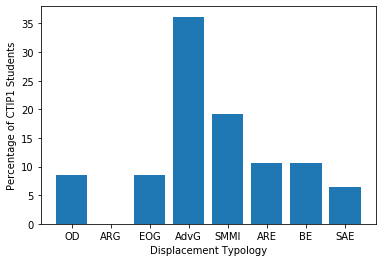

In [48]:
#Over 35% of CTIP1 students live in areas with advanced displacement 
plt.bar(col_names, new_ctip1)
plt.ylabel("Percentage of CTIP1 Students")
plt.xlabel("Displacement Typology")

In [49]:
#SAE: Stable Advanced Exclusive Typology (8)
#AdvG: Advanced Gentrification Typology (4)
#ARE: At Risk of Being Exclusive Typology (6)
#BE: Becoming Exclusive (7)
#SMMI: Stable Middle/Moderate Income (5)
#ARG: At Risk of Gentrification (2)
#EOG: Early Ongoing Gentrification (3)
#OD: Ongoing Displacement (1)
# place terms in ascending order of gentrification / displacement 
["OD", "ARG", "EOG", "AdvG", "SMMI", "ARE", "BE", "SAE"]

['OD', 'ARG', 'EOG', 'AdvG', 'SMMI', 'ARE', 'BE', 'SAE']

In [50]:
block_df_dict = pd.read_excel("/share/data/school_choice/Data/SF 2010 blks 022119 with field descriptions (1).xlsx", None, engine='openpyxl')

In [51]:
field_descriptions = block_df_dict["field descriptions"]
field_descriptions = field_descriptions.dropna(axis=0, how='all')
field_descriptions = field_descriptions.dropna(axis=1, how='all')
new_df = field_descriptions[field_descriptions["Field Name"].str.contains('CTIP')]
new_df

,Field Name,Field Description,Data Source,Commenta/Caveats
14,CTIP_2013 assignment,CTIP_2013 assignment,LGDR flagged blocks,NaN
15,Possible change in CTIP1 status Model 2,Possible change in CTIP1 status Model 2,LGDR flagged blocks,NaN


In [52]:
block_database = block_df_dict["block database"]
block_database = block_database.dropna(axis=0, how='all')
block_database = block_database.dropna(axis=1, how='all')
block_database["CTIP_2013 assignment"]


0       CTIP4
1       CTIP4
2       CTIP1
3       CTIP1
4       CTIP1
        ...  
7318    CTIP4
7319    CTIP4
7320    CTIP4
7321    CTIP4
7322    CTIP4
Name: CTIP_2013 assignment, Length: 7323, dtype: object

In [53]:
field_descriptions.head(30)

,Field Name,Field Description,Data Source,Commenta/Caveats
0,ID,ID,assigned by GIS software,NaN
1,Area,AREA,area in square miles,NaN
2,Block,Block,2010 Census block ID,NaN
3,Block Type,Block Type,land block: zero pop or populated,NaN
4,BlockGroup,BlockGroup,2010 Census block group ID,NaN
5,Tract,Tract,2010 Census Tract ID,NaN
6,County,County,2010 Census County ID,NaN
7,Place,Place,2010 Census place (city) ID,NaN
8,UnifSchool,UnifSchool,2010 Census Unified School District ID,NaN
9,ZIP5,ZIP5,5-digit ZIP Code,NaN


In [54]:
block_database["Tract"]
new_blockdf = block_database[["Tract", "CTIP_2013 assignment"]]
new_blockdf

,Tract,CTIP_2013 assignment
0,6075060400,CTIP4
1,6075060400,CTIP4
2,6075017902,CTIP1
3,6075017902,CTIP1
4,6075017902,CTIP1
...,...,...
7318,6075060400,CTIP4
7319,6075060400,CTIP4
7320,6075060400,CTIP4
7321,6075060400,CTIP4


In [55]:
ctip_data = new_blockdf.merge(df, left_on = "Tract", right_on = "GEOID", how = "left")
ctip_data = ctip_data[["Tract", "CTIP_2013 assignment", "OD", "ARG", "EOG", "AdvG", "SMMI", "ARE", "BE", "SAE"]]

In [56]:
ctip_data = ctip_data.dropna(axis=0, how='all')
ctip_data = ctip_data.dropna(axis=1, how='all')
ctip_data

,Tract,CTIP_2013 assignment,OD,ARG,EOG,AdvG,SMMI,ARE,BE,SAE
0,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6075017902,CTIP1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,6075017902,CTIP1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,6075017902,CTIP1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7318,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7319,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7320,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7321,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
ctip_data_new = ctip_data.drop_duplicates()
ctip_data_new.head(30)

,Tract,CTIP_2013 assignment,OD,ARG,EOG,AdvG,SMMI,ARE,BE,SAE
0,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6075017902,CTIP1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
60,6075061500,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
67,6075060700,CTIP3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
73,6075022600,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85,6075980900,CTIP1,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
102,6075010500,CTIP5,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
119,6075010100,CTIP2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,6075010400,CTIP4,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
135,6075010600,CTIP3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
ctip_data_final = ctip_data.drop_duplicates()
ctip_data_final

,Tract,CTIP_2013 assignment,OD,ARG,EOG,AdvG,SMMI,ARE,BE,SAE
0,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6075017902,CTIP1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
60,6075061500,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
67,6075060700,CTIP3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
73,6075022600,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6746,6075033100,CTIP5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6839,6075033201,CTIP4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6873,6075033203,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6886,6075033204,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


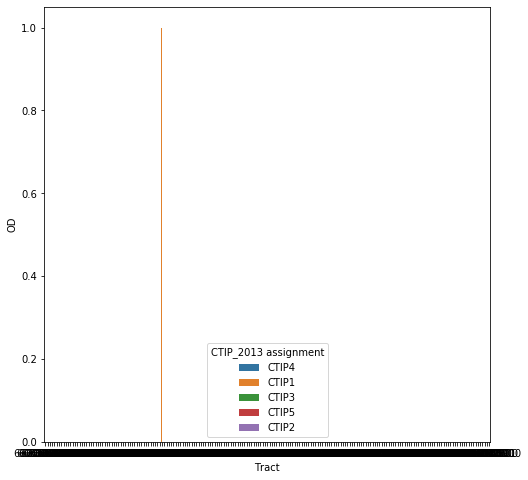

In [59]:
# Set the figure size
plt.figure(figsize=(8, 8))

# grouped barplot
sns.barplot(x="Tract", y="OD", 
            hue="CTIP_2013 assignment", data=ctip_data_final, ci=None);

In [60]:
ctip_data_new = ctip_data_new.groupby("CTIP_2013 assignment").sum()
ctip_data_new

,Tract,OD,ARG,EOG,AdvG,SMMI,ARE,BE,SAE
CTIP_2013 assignment,,,,,,,,,
CTIP1,170102589530,3,0.0,3.0,10.0,1.0,1.0,3.0,0.0
CTIP2,182251572933,4,2.0,0.0,5.0,6.0,0.0,6.0,0.0
CTIP3,164025689822,1,0.0,1.0,6.0,12.0,1.0,3.0,0.0
CTIP4,267301314229,1,0.0,0.0,8.0,13.0,9.0,8.0,3.0
CTIP5,400953499040,0,0.0,0.0,3.0,26.0,13.0,9.0,13.0


In [61]:
ctip_data_removed = ctip_data_new.drop("Tract", axis=1)
ctip_data_removed

,OD,ARG,EOG,AdvG,SMMI,ARE,BE,SAE
CTIP_2013 assignment,,,,,,,,
CTIP1,3,0.0,3.0,10.0,1.0,1.0,3.0,0.0
CTIP2,4,2.0,0.0,5.0,6.0,0.0,6.0,0.0
CTIP3,1,0.0,1.0,6.0,12.0,1.0,3.0,0.0
CTIP4,1,0.0,0.0,8.0,13.0,9.0,8.0,3.0
CTIP5,0,0.0,0.0,3.0,26.0,13.0,9.0,13.0


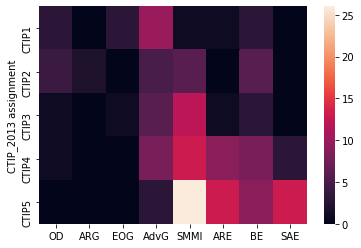

In [62]:
sns.heatmap(ctip_data_removed)

In [63]:
updated_FRL = pd.read_excel("/share/data/school_choice/dssg/riyab_FRL_data.xlsx", None, engine='openpyxl')
updated_FRL

{'Field Description':                   Field Name  \
 0                GeoID Group   
 1                        NaN   
 2      4YR AVG Student Count   
 3          4YR AVG FRL Count   
 4     4YR AVG Eth Flag Count   
 5   4YR AVG Combo Flag Count   
 6                        NaN   
 7                        NaN   
 8                        NaN   
 9                        NaN   
 10                       NaN   
 11                       NaN   
 
                                           Description  Unnamed: 2  Unnamed: 3  \
 0   If a block has 5+ students, the GeoID Group = ...         NaN         NaN   
 1   If a block has <5 students, the GeoID Group = ...         NaN         NaN   
 2   Count of the avg # of students living in a Geo...         NaN         NaN   
 3   Count of the Avg # of students in a GeoID grou...         NaN         NaN   
 4   Count of the Avg # of students in a GeoID grou...         NaN         NaN   
 5   Count of the Avg # of students in a GeoID grou...  

In [64]:
grouped_Geoid = updated_FRL["Grouped GeoID External"]
grouped_Geoid.tail(10)

,Geoid10,Geoid Group,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count
4584,60750264011010,60750264011010,137.25,100.50,72.50,52.75
4585,60750614001000,60750614001000,141.75,118.50,110.75,95.00
4586,60750231031006,60750231031006,154.50,120.25,109.50,85.25
4587,60750231021014,60750231021014,157.25,109.25,119.50,81.75
4588,60750231022004,60750231022004,166.25,126.00,140.50,107.00
4589,60750610001004,60750610001004,168.75,91.75,75.25,48.00
4590,60750234002014,60750234002014,176.75,153.25,147.00,127.75
4591,60750231032017,60750231032017,187.25,136.25,149.00,107.00
4592,60750605022000,60750605022000,197.00,174.50,140.50,121.25
4593,60750125011002,60750125011002,200.75,153.00,90.00,68.00


In [65]:
grouped_Geoid_filtered = grouped_Geoid[grouped_Geoid["Geoid Group"].astype('str').str.len() > 3]
grouped_Geoid_filtered

,Geoid10,Geoid Group,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count
1636,60750161002003,60750161002003,5.00,5.00,1.00,1.00
1637,60750209004007,60750209004007,5.00,4.50,4.75,4.25
1638,60750177002016,60750177002016,5.00,4.50,2.25,2.25
1639,60750104001004,60750104001004,5.00,3.75,0.25,0.00
1640,60750228011002,60750228011002,5.00,3.50,2.00,1.00
...,...,...,...,...,...,...
4589,60750610001004,60750610001004,168.75,91.75,75.25,48.00
4590,60750234002014,60750234002014,176.75,153.25,147.00,127.75
4591,60750231032017,60750231032017,187.25,136.25,149.00,107.00
4592,60750605022000,60750605022000,197.00,174.50,140.50,121.25


In [66]:
percent_FRL = grouped_Geoid_filtered["4YR AVG FRL Count"]/grouped_Geoid_filtered["4YR AVG Student Count"]
percent_FRL

1636    1.000000
1637    0.900000
1638    0.900000
1639    0.750000
1640    0.700000
          ...   
4589    0.543704
4590    0.867044
4591    0.727637
4592    0.885787
4593    0.762142
Length: 2958, dtype: float64

Text(0, 0.5, 'Frequency')

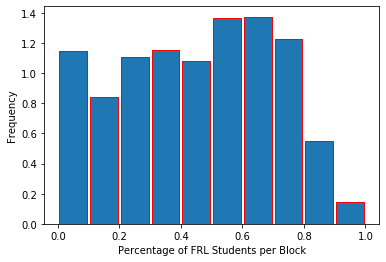

In [67]:
plt.hist(percent_FRL, density = True, bins = 10, rwidth = .9, edgecolor='red')
plt.xlabel("Percentage of FRL Students per Block")
plt.ylabel("Frequency")

In [68]:
percent_AALPI = grouped_Geoid_filtered["4YR AVG Eth Flag Count"]/grouped_Geoid_filtered["4YR AVG Student Count"]
percent_AALPI

1636    0.200000
1637    0.950000
1638    0.450000
1639    0.050000
1640    0.400000
          ...   
4589    0.445926
4590    0.831683
4591    0.795728
4592    0.713198
4593    0.448319
Length: 2958, dtype: float64

Text(0, 0.5, 'Frequency')

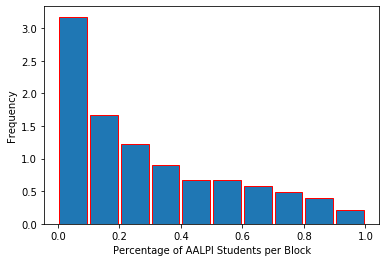

In [69]:
plt.hist(percent_AALPI, density = True, bins = 10, rwidth = .9, edgecolor='red')
plt.xlabel("Percentage of AALPI Students per Block")
plt.ylabel("Frequency")

In [70]:
percent_both = grouped_Geoid_filtered["4YR AVG Combo Flag Count"]/grouped_Geoid_filtered["4YR AVG Student Count"]
percent_both

1636    0.200000
1637    0.850000
1638    0.450000
1639    0.000000
1640    0.200000
          ...   
4589    0.284444
4590    0.722772
4591    0.571429
4592    0.615482
4593    0.338730
Length: 2958, dtype: float64

Text(0, 0.5, 'Frequency')

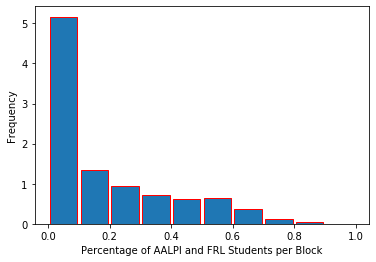

In [71]:
plt.hist(percent_both, density = True, bins = 10, rwidth = .9, edgecolor='red')
plt.xlabel("Percentage of AALPI and FRL Students per Block")
plt.ylabel("Frequency")

In [72]:
block_database["Block"]

0       60750604001012
1       60750604001011
2       60750179021024
3       60750179021028
4       60750179021013
             ...      
7318    60750604001007
7319    60750604001015
7320    60750604001018
7321    60750604001032
7322    60750604001033
Name: Block, Length: 7323, dtype: int64

In [73]:
block_database["CTIP_2013 assignment"]

0       CTIP4
1       CTIP4
2       CTIP1
3       CTIP1
4       CTIP1
        ...  
7318    CTIP4
7319    CTIP4
7320    CTIP4
7321    CTIP4
7322    CTIP4
Name: CTIP_2013 assignment, Length: 7323, dtype: object

In [74]:
grouped_Geoid_filtered["Geoid Group"]

1636    60750161002003
1637    60750209004007
1638    60750177002016
1639    60750104001004
1640    60750228011002
             ...      
4589    60750610001004
4590    60750234002014
4591    60750231032017
4592    60750605022000
4593    60750125011002
Name: Geoid Group, Length: 2958, dtype: int64

In [75]:
updated_FRL["Field Description"]["Description"][0]

'If a block has 5+ students, the GeoID Group = the GeoID for that census block. All of the following fields preserve the data for that individual block.'

In [76]:
new_merge = grouped_Geoid_filtered.merge(block_database, left_on = "Geoid Group", right_on = "Block")
new_merge

,Geoid10,Geoid Group,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,ID,AREA,DATA,Block,...,2017 9-12 Multi-Race,2017 K-5 Other,2017 6-8 Other,2017 9-12 Other,2017 K-5 Samoan,2017 6-8 Samoan,2017 9-12 Samoan,2017 K-5 White,2017 6-8 White,2017 9-12 White
0,60750161002003,60750161002003,5.00,5.00,1.00,1.00,304350,0.002151,310142,60750161002003,...,0,0,0,1,0,0,0,0,0,0
1,60750209004007,60750209004007,5.00,4.50,4.75,4.25,347135,0.003479,356608,60750209004007,...,0,0,0,0,0,0,0,0,0,0
2,60750177002016,60750177002016,5.00,4.50,2.25,2.25,358788,0.013418,369123,60750177002016,...,0,0,0,1,0,0,0,0,0,0
3,60750104001004,60750104001004,5.00,3.75,0.25,0.00,407628,0.001641,415736,60750104001004,...,0,0,0,0,0,0,0,0,0,0
4,60750228011002,60750228011002,5.00,3.50,2.00,1.00,354807,0.004678,364232,60750228011002,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,60750610001004,60750610001004,168.75,91.75,75.25,48.00,140203,0.153174,140093,60750610001004,...,1,2,0,0,1,4,0,3,2,1
2956,60750234002014,60750234002014,176.75,153.25,147.00,127.75,185949,0.009265,189455,60750234002014,...,3,0,0,0,9,5,15,0,1,0
2957,60750231032017,60750231032017,187.25,136.25,149.00,107.00,188270,0.038954,191754,60750231032017,...,2,0,1,1,13,4,7,0,0,0
2958,60750605022000,60750605022000,197.00,174.50,140.50,121.25,131659,0.014452,133583,60750605022000,...,1,0,0,1,9,5,11,0,0,1


In [77]:
new_merge_grouped = new_merge.groupby("CTIP_2013 assignment").mean()
new_merge_grouped

,Geoid10,Geoid Group,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,AREA,DATA,Block,BlockGroup,...,non-AALPI all TK5 stu 2017,DS or ML all TK5 stu 2017,All Others all TK5 stu 2017,AALPI reg TK5 stu 2017,non-AALPI reg TK5 stu 2017,DS or ML reg TK5 stu 2017,All Others reg TK5 stu 2017,AALPI_1517_K8,NH_Wht1517,NH_Asn1517
CTIP_2013 assignment,,,,,,,,,,,,,,,,,,,,,
CTIP1,6.075044e+13,6.075044e+13,29.673044,21.255527,20.864583,15.720663,0.007736,296582.573980,6.075044e+13,6.075044e+10,...,4.928571,2.599490,2.329082,6.844388,3.936224,2.030612,1.905612,44.436224,3.635204,6.155612
CTIP2,6.075028e+13,6.075028e+13,24.552058,16.519370,10.453995,7.477401,0.006460,221608.895884,6.075028e+13,6.075028e+10,...,6.341404,1.997579,4.343826,3.731235,5.312349,1.585956,3.726392,21.588378,3.217918,16.779661
CTIP3,6.075027e+13,6.075027e+13,17.667349,10.807965,6.390207,4.315466,0.006352,160295.350245,6.075027e+13,6.075027e+10,...,4.864157,1.466448,3.397709,2.296236,4.117840,1.199673,2.918167,13.031097,2.166939,13.191489
CTIP4,6.075032e+13,6.075032e+13,13.579480,5.494581,2.439306,1.287211,0.007950,219917.411850,6.075032e+13,6.075032e+10,...,5.497110,1.855491,3.641618,0.965318,4.718208,1.591040,3.127168,5.286127,6.674855,10.673410
CTIP5,6.075031e+13,6.075031e+13,11.260563,3.022594,1.291373,0.470070,0.009012,169575.909624,6.075031e+13,6.075031e+10,...,4.957746,1.623239,3.334507,0.564554,4.159624,1.365023,2.794601,2.771127,6.942488,8.661972


In [78]:
new_merge_grouped = new_merge_grouped[["4YR AVG Student Count", "4YR AVG FRL Count",
                                      "4YR AVG Eth Flag Count", "4YR AVG Combo Flag Count"]]
new_merge_grouped

,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count
CTIP_2013 assignment,,,,
CTIP1,29.673044,21.255527,20.864583,15.720663
CTIP2,24.552058,16.519370,10.453995,7.477401
CTIP3,17.667349,10.807965,6.390207,4.315466
CTIP4,13.579480,5.494581,2.439306,1.287211
CTIP5,11.260563,3.022594,1.291373,0.470070


In [83]:
new_merge_grouped["FRL"] = (new_merge_grouped["4YR AVG FRL Count"] - new_merge_grouped["4YR AVG Combo Flag Count"])/new_merge_grouped["4YR AVG Student Count"]
new_merge_grouped["AALPI"] = (new_merge_grouped["4YR AVG Eth Flag Count"] - new_merge_grouped["4YR AVG Combo Flag Count"])/new_merge_grouped["4YR AVG Student Count"]
new_merge_grouped["Combo"] = new_merge_grouped["4YR AVG Combo Flag Count"]/new_merge_grouped["4YR AVG Student Count"]
new_merge_grouped["Other"] = (new_merge_grouped["4YR AVG Student Count"] - ((new_merge_grouped["4YR AVG FRL Count"] + new_merge_grouped["4YR AVG Eth Flag Count"]) - new_merge_grouped["4YR AVG Combo Flag Count"]))/new_merge_grouped["4YR AVG Student Count"]
new_merge_grouped




<ipython-input-83-9c3b93b1acec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merge_grouped["FRL"] = (new_merge_grouped["4YR AVG FRL Count"] - new_merge_grouped["4YR AVG Combo Flag Count"])/new_merge_grouped["4YR AVG Student Count"]
<ipython-input-83-9c3b93b1acec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merge_grouped["AALPI"] = (new_merge_grouped["4YR AVG Eth Flag Count"] - new_merge_grouped["4YR AVG Combo Flag Count"])/new_merge_grouped["4YR AVG Student Count"]
<ipython-input-83-9c3b93b

,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,FRL,AALPI,Combo,Other
CTIP_2013 assignment,,,,,,,,
CTIP1,29.673044,21.255527,20.864583,15.720663,0.186528,0.173353,0.529796,0.110322
CTIP2,24.552058,16.519370,10.453995,7.477401,0.368277,0.121236,0.304553,0.205934
CTIP3,17.667349,10.807965,6.390207,4.315466,0.367486,0.117434,0.244262,0.270818
CTIP4,13.579480,5.494581,2.439306,1.287211,0.309833,0.084841,0.094791,0.510535
CTIP5,11.260563,3.022594,1.291373,0.470070,0.226678,0.072936,0.041745,0.658641


Text(0.5, 1, '4YR Average of Student Demographic Counts')

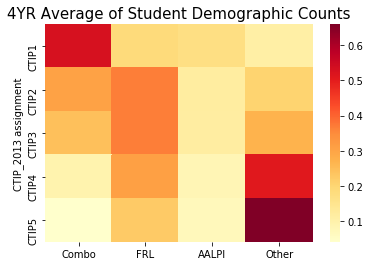

In [88]:
ax = sns.heatmap(new_merge_grouped[["Combo", "FRL", "AALPI", "Other"]], cmap = "YlOrRd")
plt.title("4YR Average of Student Demographic Counts", fontsize = 15)

In [ ]:
#heatmap of demographics vs gentrification 
#normalize the heatmap above 